In [20]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_colwidth', 50)

In [22]:
colnames = ['id', 'workName', 'overallRating', 'review']
df = pd.read_csv(os.path.abspath('./Datasets/animeReviewsOrderByTime.csv'), usecols=np.arange(15))
df = df[colnames]
df = df.dropna()
df = df.drop(df[df['review'] == ''].index)
df.head(10)

C:\Users\Armand Syahtama\envs\csi4106\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,workName,overallRating,review
0,8121,Cowboy_Bebop,10,Cowboy Bebop is an episodic series. By episodi...
1,63480,Utawarerumono,8,Utawarerumono manages to be one of those harem...
2,8452,Hajime_no_Ippo,10,"First, let me say that I\\'m not a fan of boxi..."
3,66544,Gensoumaden_Saiyuuki,9,Saiyuki is one of those animes that just grabs...
4,55936,Ranma_½,7,A comedy/romance based on the manga by Rumiko ...
5,22039,Kino_no_Tabi__The_Beautiful_World,9,What do you say about an anime that is just ab...
6,68626,Kareshi_Kanojo_no_Jijou,8,Kare Kano was a romance anime that could have ...
7,18797,Hunter_x_Hunter,10,Overall: My very best anime and i haven't act...
8,43899,Golden_Boy,10,Overall:Honestly I really don't care about oth...
9,18796,Hunter_x_Hunter,10,Hunters… What do you think about when you hear...


In [23]:
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

english_stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
detokenizer = TreebankWordDetokenizer()
punctuation_to_remove = string.punctuation
punctuation_to_remove = punctuation_to_remove.replace('.', '')

def preprocess_text(text: str, split_word: bool = True):
    text = text.lower() # lower the case
    text = text.strip()
    text = "".join([c if c not in punctuation_to_remove else ' ' for c in text]) # take out punctuation
    tokens = word_tokenize(text) # tokenize text
    tokens = [w for w in tokens if w not in english_stopwords] # remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # lemmatize all the words
    tokens = [w for w in tokens if w.isalpha()]
    return detokenizer.detokenize(tokens)

In [24]:
df['review'] = df['review'].apply(lambda x: preprocess_text(x))
df['review'].head(10)

0    cowboy bebop episodic series episodic mean one...
1    utawarerumono manages one harem anime anyone p...
2    first let say fan boxing fact pretty much hate...
3    saiyuki one anime grab first episode let go ev...
4    comedy romance based manga rumiko takahashi ra...
5    say anime traveler journeying different countr...
6    kare kano romance anime could become incredibl...
7    overall best anime actually seen anything else...
8    overall honestly really care others opinion an...
9    think hear anime people killing poor cute anim...
Name: review, dtype: object

In [25]:
# determines whether score is positive (1) or not (0)
def determine_sentiment(score: int):
    return 1 if score > 7 else 0

df['sentiment'] = df['overallRating'].apply(lambda x: determine_sentiment(x))
df.head(10)

,id,workName,overallRating,review,sentiment
0,8121,Cowboy_Bebop,10,cowboy bebop episodic series episodic mean one...,1
1,63480,Utawarerumono,8,utawarerumono manages one harem anime anyone p...,1
2,8452,Hajime_no_Ippo,10,first let say fan boxing fact pretty much hate...,1
3,66544,Gensoumaden_Saiyuuki,9,saiyuki one anime grab first episode let go ev...,1
4,55936,Ranma_½,7,comedy romance based manga rumiko takahashi ra...,0
5,22039,Kino_no_Tabi__The_Beautiful_World,9,say anime traveler journeying different countr...,1
6,68626,Kareshi_Kanojo_no_Jijou,8,kare kano romance anime could become incredibl...,1
7,18797,Hunter_x_Hunter,10,overall best anime actually seen anything else...,1
8,43899,Golden_Boy,10,overall honestly really care others opinion an...,1
9,18796,Hunter_x_Hunter,10,think hear anime people killing poor cute anim...,1


In [26]:
df['sentiment'].value_counts()

1    77181
0    58018
Name: sentiment, dtype: int64

In [36]:
df['review'].replace('', np.nan, inplace=True)
df.dropna(subset=['review'], inplace=True)
df.to_csv('./Datasets/processedAnimeReviews.csv', encoding='utf-8', index=False)

## EDA

In [37]:
import seaborn as sns
sns.set()

# Display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,135181.0,124980.969152,230978.049574,169.0,37259.0,71570.0,105655.0,1116393.0
overallRating,135181.0,7.400959,2.295520,0.0,6.0,8.0,9.0,11.0
sentiment,135181.0,0.570842,0.494958,0.0,0.0,1.0,1.0,1.0


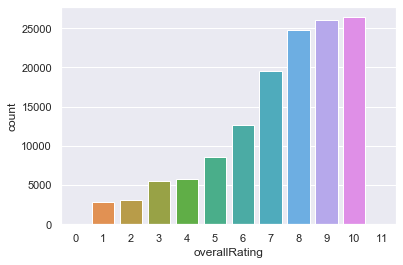

In [39]:
g = sns.countplot(df['overallRating'])

Reviews are skewed to the left meaning much more positives reviews with average overall rating of 7.4

In [40]:
# View odd reviews
odd_reviews = df.query('overallRating in [0, 11]')
odd_reviews

,id,workName,overallRating,review,sentiment
3361,62646,Elfen_Lied,0,loved elfen lied thriller anime myriad emotion...,0
97599,124865,Hametsu_no_Mars,11,contemporanean masterpiece look sound everythi...,1
100103,124809,Nami,0,stop motion animation certainly good example t...,0


In [41]:
odd_reviews['review'].iloc[0]

'loved elfen lied thriller anime myriad emotion every turn without giving much away say end sad yet happy character obviously well thought lucy best personality would change helpful'

In [42]:
odd_reviews['review'].iloc[1]

'contemporanean masterpiece look sound everything perfect animation exposed museum people world perfection anime story interation character well constructed character ever seen well constructed world ever seen entertaiment medium whole journey seen well done minute even perfection int story kid violence cruelty seen show unbelievable feel character journey best ending ever art beatiful animation ever see like real world express feeling animator fully joy soundtrack still hear overwhelming pressure heard action scene volume bursting calm scene give u tension enjoyment enjoy show perfect overall simply score'

In [43]:
odd_reviews['review'].iloc[2]

'stop motion animation certainly good example traditional animation saved either good reason anime critically acclaimed story anime involves large number fish crawling young woman vagina think really count story first place happens could call art hyper realistic would giving far much credit stop motion us real life prop animated still image animation look quite choppy since take enough picture truly look fluid girl least move fairly realistically first making look like filmed fish cgi go becomes obvious done image girl good acting stop motion sure took lot time certainly make sound extremely disturbing slimy pleasant amplified awful anime animation bad enough sound effect made fish sound lubricated make even worse much else sound gross fishy character entire anime girl sits take fish like man speak seems tardis hidden inside vagina since fish keep going never fill seem much personality attribute physical one much anything talk really call fish character either although seem kind homing

Interesting

1    0.570842
0    0.429158
Name: sentiment, dtype: float64

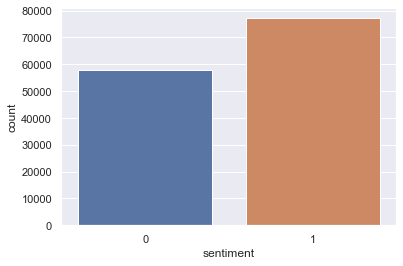

In [44]:
g = sns.countplot(df['sentiment'])
df['sentiment'].value_counts(normalize=True)

Defining the the negative sentiment as value of 5 and less lead to Highly imbalanced distribution of classes with 80% greater than 5 and 20% less than 5. Changing it to 7 creates a more balanced distribution and properly reflects the behaviour of MyAnimeList users when it comes to rating. They tend to rate majority of their watched shows as 7 and above, considering it average, while 6 and below they rate for shows that don't have merit to them but still fun to watch